In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/content/AirPassengers.csv')

# Step 2: Convert 'Month' column to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [8]:

# Step 3: Apply Moving Average Smoothing (e.g., 12-month window)
window_size = 12
df['Smoothed'] = df['#Passengers'].rolling(window=window_size).mean()

# Step 4: Forecast future values (next 12 months) using average of last 12 smoothed values
last_window = df['#Passengers'][-window_size:]
forecast_values = [last_window.mean()] * 12

# Step 5: Create future dates for the next 12 months
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')


In [9]:

# Step 6: Create a DataFrame for forecasted smoothed values
forecast_df = pd.DataFrame({'Smoothed Forecast': forecast_values}, index=future_dates)

# Step 7: Combine original and forecasted smoothed data
combined_df = pd.concat([df[['Smoothed']], forecast_df])


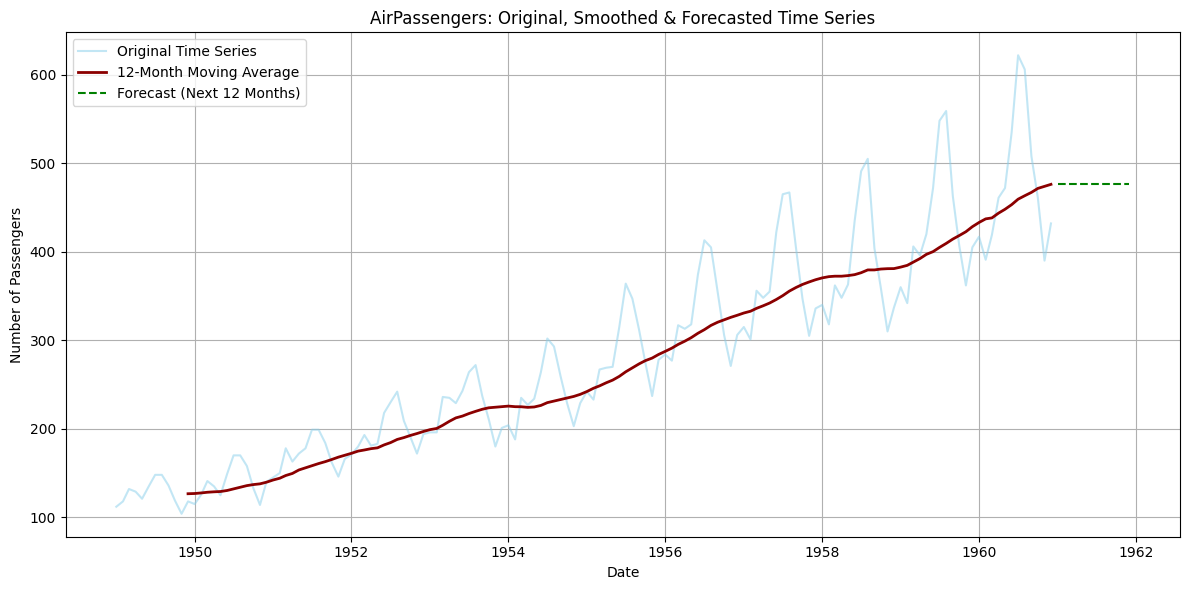

In [10]:

# Step 8: Plot the original, smoothed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Original Time Series', color='skyblue', alpha=0.5)
plt.plot(df['Smoothed'], label=f'{window_size}-Month Moving Average', color='darkred', linewidth=2)
plt.plot(forecast_df, label='Forecast (Next 12 Months)', linestyle='--', color='green')
plt.title('AirPassengers: Original, Smoothed & Forecasted Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:

# Step 9: Display forecasted values
print("Forecasted Values (Next 12 Months):")
print(forecast_df)



Forecasted Values (Next 12 Months):
            Smoothed Forecast
1961-01-01         476.166667
1961-02-01         476.166667
1961-03-01         476.166667
1961-04-01         476.166667
1961-05-01         476.166667
1961-06-01         476.166667
1961-07-01         476.166667
1961-08-01         476.166667
1961-09-01         476.166667
1961-10-01         476.166667
1961-11-01         476.166667
1961-12-01         476.166667
